### Assignment 18 - Forecasting 

#### 1st Problem Statement

Forecast the CocaCola prices, Explain how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for Forecasting.

Dataset --> CocaCola_Sales_Rawdata.xlsx

In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import sqrt
import itertools
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)
Dataset.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [3]:
#Checking NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


Inference: No NA Values Present

### Forecasting - Visualization

#### Line Plot

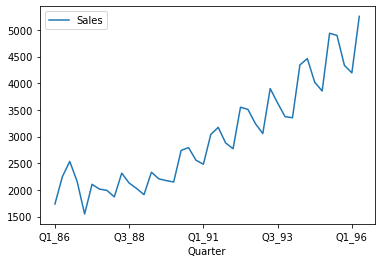

In [4]:
# Line Plot
Dataset.plot()
pyplot.show()

Inference: A Simple Line Plot Showing the Quarter wise Sales

#### Histogram and Density Plots

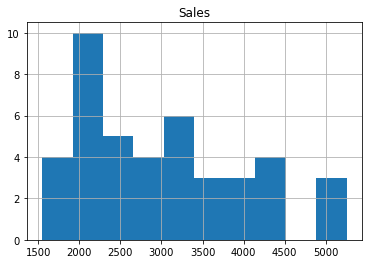

In [5]:
# Histogram
Dataset.hist()
pyplot.show()

Inference: Data is Fairly Distributed, Close to Normal Distribution

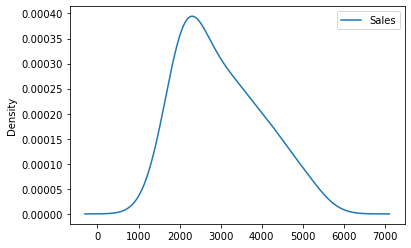

In [6]:
#Density Plot
Dataset.plot(kind='kde')
pyplot.show()

Inference: Close to Normal Distribution, Values are Concentrated around 2500 (i.e: 2500 Sales)

#### Lag plot

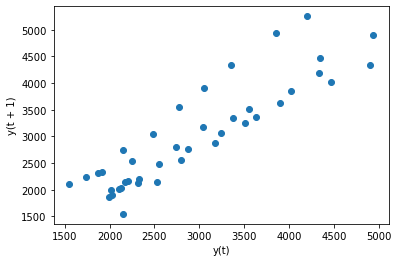

In [7]:
# create a scatter plot / Lag Plot
from pandas.plotting import lag_plot
#Plotting
lag_plot(Dataset)
pyplot.show()

Inference: There is a Linear Relationship betwwen the Y(t) & Y(t + 1) Variable

#### ACF Plot

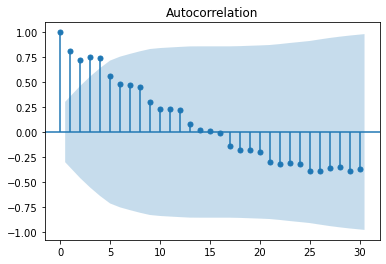

In [8]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
#Plotting
plot_acf(Dataset,lags=30)
pyplot.show()

Inference: Only First Few lags have Statistically Significant Correlation

### Forecasting -  Model Based Methods

In [9]:
#Creating t, t_sq & log_t Variables
Dataset["t"] = np.arange(1,43)
Dataset["t_sq"] = np.sqrt(Dataset["t"])
Dataset["log_sales"] = np.log(Dataset["Sales"])
Dataset.head()

,Sales,t,t_sq,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1.000000,7.458663
Q2_86,2244.960999,2,1.414214,7.716443
Q3_86,2533.804993,3,1.732051,7.837477
Q4_86,2154.962997,4,2.000000,7.675529
Q1_87,1547.818996,5,2.236068,7.344602


Inference: Now we have variable t, t_sq & log_sales(log_Y) for Model Based Methods

#### Splitting data

In [10]:
# Splitting
Train = Dataset.head(35)
Test = Dataset.tail(7)

Inference: Data is splitted, Kept 7 Quarters for Validation

In [11]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351148

Inference: Linear Model RMSE = 636.5

In [12]:
#Exponential Model

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.348648484222

Inference: Exponential Model RMSE = 493.34

In [13]:
#Quadratic Model
Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

415.33464222539277

Inference: Quadratic Model RMSE = 415.33

#####  Can't Approach Model Based Methods as getting RSME Very Huge, and there are around 40 variable to put into further Equation which is computationally Intensive for my system

### Forecasting -  Data Driven Methods

In [14]:
# Data Driven Model Library
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [15]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/CocaCola_Sales_Rawdata.xlsx", header=0, parse_dates=True)
Dataset.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


#### Splitting data

In [16]:
# Splitting
Train = Dataset.head(35)
Test = Dataset.tail(7)

#### Simple Exponential Method (SES)

In [17]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
ses_model_rmse = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_ses))**2))
ses_model_rmse

922.9178301521721

Inference: Simple Exponential Method (SES) RSME = 922.91

#### Holt method (DES)

In [18]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
hw_model_rmse = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_hw))**2))
hw_model_rmse

796.7270704370691

Inference: Holt's Method (DES) MAPE = 796.72

#### Holts winter exponential smoothing with additive seasonality and additive trend (TES)

In [19]:
#add the trend to the model
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_add_add_rmse = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_hwe_add_add))**2))
hwe_model_add_add_rmse

204.22249870091514

Inference: Holt's Winter Method (TES) MAPE = 204.22

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_mul_add_rmse = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_hwe_mul_add))**2))
hwe_model_mul_add_rmse

100.09672925838048

Inference: Holt's Winter Method (TES) MAPE = 100.09

### Forecasting - Arima Models

In [21]:
# Loading the Dataset
Dataset = pd.read_excel("C:/Users/Akaash/Downloads/CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)
Dataset.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


#### ACF plots and PACF plots

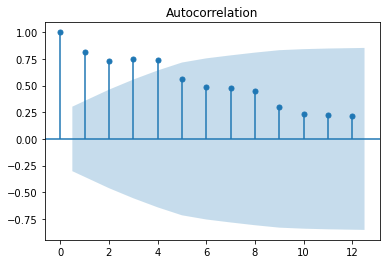

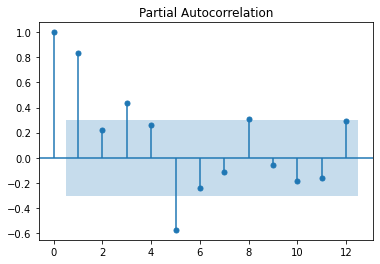

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Dataset.Sales,lags=12)
tsa_plots.plot_pacf(Dataset.Sales,lags=12)
plt.show()

#### Splitting data

In [23]:
# separate out a validation dataset
split_point = len(Dataset) - 7
dataset, validation = Dataset[0:split_point], Dataset[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('C:/Users/Akaash/Downloads/dataset_2nd.csv', header=False)
validation.to_csv('C:/Users/Akaash/Downloads/validation_2nd.csv', header=False)

Dataset 35, Validation 7


#### Persistence/ Base model

In [24]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('C:/Users/Akaash/Downloads/dataset_2nd.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


Inference: Persistence Model RMSE = 434.40

#### ARIMA Hyperparameters 

In [25]:
# grid search ARIMA parameters for a time series
from statsmodels.tsa.arima_model import ARIMA

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [26]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [27]:
# load dataset
train = read_csv('C:/Users/Akaash/Downloads/dataset_2nd.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
#Grid Search Evaluate
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1008.453
ARIMA(0, 0, 1) RMSE=722.334
ARIMA(0, 0, 2) RMSE=477.153
ARIMA(0, 1, 0) RMSE=429.275
ARIMA(0, 1, 1) RMSE=442.484
ARIMA(0, 1, 2) RMSE=405.285
ARIMA(0, 2, 0) RMSE=647.158
ARIMA(0, 2, 1) RMSE=450.741
ARIMA(0, 2, 2) RMSE=416.198
ARIMA(1, 0, 0) RMSE=519.877
ARIMA(1, 1, 0) RMSE=429.820
ARIMA(1, 2, 0) RMSE=619.416
ARIMA(2, 0, 0) RMSE=539.169
ARIMA(2, 1, 0) RMSE=352.515
ARIMA(2, 2, 0) RMSE=542.789
Best ARIMA(2, 1, 0) RMSE=352.515


#### Building Arima Model based on the optimized values From Grid Search CV

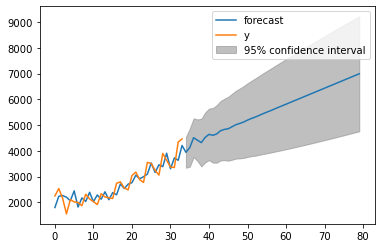

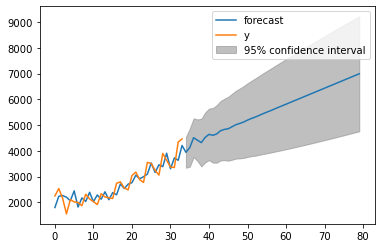

In [28]:
# Building  Arima Model with order=(2,1,0)
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=7)[0]
model_fit.plot_predict(1,80)

In [29]:
#Error on the test data
val=pd.read_csv('C:/Users/Akaash/Downloads/validation_2nd.csv',header=None)
arima_rmse = sqrt(mean_squared_error(val[1], forecast))
arima_rmse

373.4800008933816

Inference: Arima Model RMSE = 373.48

### Document of All Model RMSE

In [30]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_arima","ses_model_rmse","hw_model_rmse",
                           "hwe_model_add_add_rmse","hwe_model_mul_add_rmse"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,arima_rmse,ses_model_rmse,hw_model_rmse,
                                 hwe_model_add_add_rmse,hwe_model_mul_add_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,hwe_model_mul_add_rmse,100.096729
6,hwe_model_add_add_rmse,204.222499
3,rmse_arima,373.480001
2,rmse_Quad,415.334642
1,rmse_Exp,493.348648
0,rmse_linear,636.507293
5,hw_model_rmse,796.727070
4,ses_model_rmse,922.917830


##### Inference: From this Document Table We Can See "hwe_model_mul_add_rmse" i.e. (Holts winter exponential smoothing with multiplicative seasonality and additive trend Model) has the Lowest RMSE So will Build Final Model of "Holts winter exponential smoothing with multiplicative seasonality and additive trend"

#### Final Model - Holts winter exponential smoothing with multiplicative seasonality and additive trend Model - (RMSE = 100.09)

In [31]:
#Building The Final Model On The Entire Dataset 
hwe_model_mul_add = ExponentialSmoothing(Dataset["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [32]:
#Forecasting for next 7 time periods
hwe_model_mul_add.forecast(7)

42    4921.508206
43    4587.981568
44    4532.396905
45    5757.236098
46    5816.204292
47    5208.816817
48    4956.798219
dtype: float64

Inference: Forecast of Next 7 Time Periods Using "hwe_model_mul_add" Model